# Spaceship Titanic - Previsão de Transporte para Dimensão Alternativa

## Contextualização do Problema

Neste projeto, abordaremos o desafio **Spaceship Titanic** da Kaggle, que consiste em prever quais passageiros foram transportados para uma dimensão alternativa durante uma colisão de um navio espacial com uma anomalia espaço-temporal.

### Objetivo
Desenvolver um modelo de Machine Learning capaz de prever, com base nas características dos passageiros, se eles foram ou não transportados (variável target: `Transported`).

### Dataset
O dataset contém informações sobre cerca de 13.000 passageiros, incluindo:
- **PassengerId**: Identificador único do passageiro
- **HomePlanet**: Planeta de origem (Earth, Europa, Mars)
- **CryoSleep**: Se o passageiro estava em sono criogênico
- **Cabin**: Localização da cabine (deck/num/side)
- **Destination**: Planeta de destino
- **Age**: Idade do passageiro
- **VIP**: Status VIP
- **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Gastos em diferentes amenidades
- **Name**: Nome do passageiro
- **Transported**: Variável alvo (True/False)

In [17]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Configuração de visualização
# plt.style.use('seaborn-v0_8-darkgrid')
# sns.set_palette("husl")
# pd.set_option('display.max_columns', None)

print("✓ Bibliotecas importadas com sucesso!")

✓ Bibliotecas importadas com sucesso!


## 1. Exploração Inicial dos Dados

Vamos carregar os dados e realizar uma análise exploratória inicial para entender a estrutura, tipos de dados e possíveis problemas.

In [18]:
# Carregamento dos dados
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Dimensões do conjunto de treino: {train_df.shape}")
print(f"Dimensões do conjunto de teste: {test_df.shape}")
print("\n" + "="*60)
print("Primeiras linhas do conjunto de treino:")
train_df.head()

Dimensões do conjunto de treino: (8693, 14)
Dimensões do conjunto de teste: (4277, 13)

Primeiras linhas do conjunto de treino:


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [19]:
# Informações sobre os dados
print("Informações do Dataset:")
print(train_df.info())
print("\n" + "="*60)
print("\nTipos de dados:")
print(train_df.dtypes)

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None


Tipos de dados:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object

In [20]:
# Estatísticas descritivas
print("Estatísticas Descritivas - Variáveis Numéricas:")
train_df.describe()

Estatísticas Descritivas - Variáveis Numéricas:


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Valores Faltantes no Conjunto de Treino:
              Valores Faltantes  Percentual (%)
CryoSleep                   217        2.496261
ShoppingMall                208        2.392730
VIP                         203        2.335212
HomePlanet                  201        2.312205
Name                        200        2.300702
Cabin                       199        2.289198
VRDeck                      188        2.162660
FoodCourt                   183        2.105142
Spa                         183        2.105142
Destination                 182        2.093639
RoomService                 181        2.082135
Age                         179        2.059128


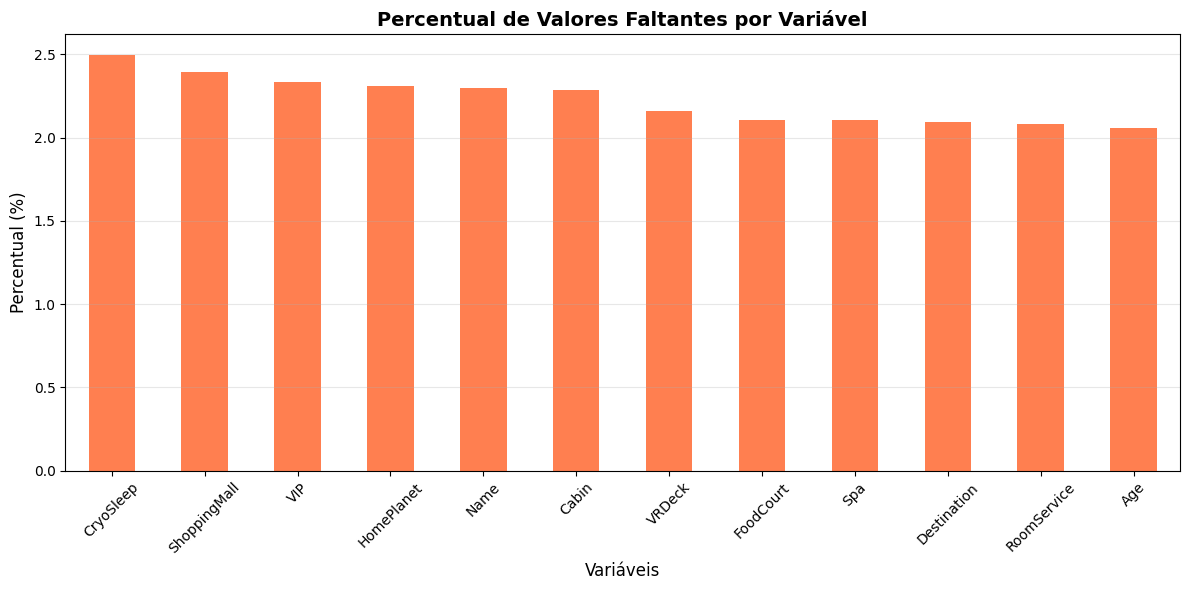

In [21]:
# Análise de valores faltantes
print("Valores Faltantes no Conjunto de Treino:")
missing_train = train_df.isnull().sum()
missing_train_pct = (train_df.isnull().sum() / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Valores Faltantes': missing_train,
    'Percentual (%)': missing_train_pct
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print(missing_df)

# Visualização de valores faltantes
plt.figure(figsize=(12, 6))
missing_df['Percentual (%)'].plot(kind='bar', color='coral')
plt.title('Percentual de Valores Faltantes por Variável', fontsize=14, fontweight='bold')
plt.xlabel('Variáveis', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Distribuição da Variável Alvo (Transported):
Transported
True     4378
False    4315
Name: count, dtype: int64

Percentual de balanceamento:
Transported
True     50.362361
False    49.637639
Name: proportion, dtype: float64


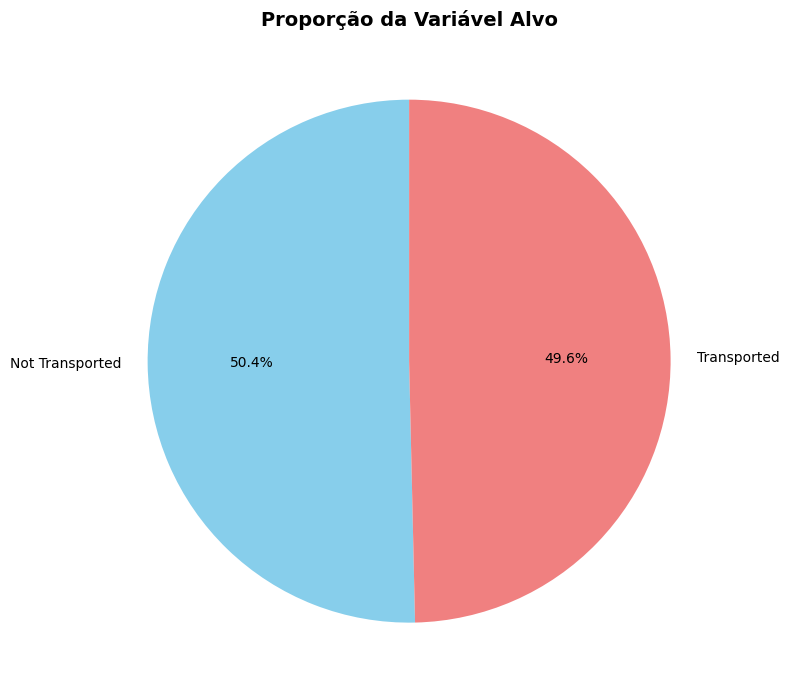

In [22]:
# Análise da variável alvo
print("Distribuição da Variável Alvo (Transported):")
print(train_df['Transported'].value_counts())
print(f"\nPercentual de balanceamento:")
print(train_df['Transported'].value_counts(normalize=True) * 100)

# Gráfico de pizza
plt.figure(figsize=(8, 8))
train_df['Transported'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                            colors=['skyblue', 'lightcoral'], startangle=90,
                                            labels=['Not Transported', 'Transported'])
plt.title('Proporção da Variável Alvo', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Insights da Exploração Inicial:

1. **Dimensões**: O dataset de treino possui 8.693 linhas e 14 colunas, e o de teste possui 4.277 linhas e 13 colunas
2. **Valores Faltantes**: Existem valores ausentes em diversas variáveis (Cabin ~2.3%, Age ~2.1%, VIP ~2.3%, etc.), mas todos abaixo de 2.5%
3. **Balanceamento**: A variável alvo está aproximadamente balanceada (50.4% Transported / 49.6% Not Transported), o que é favorável para modelagem
4. **Tipos de Dados**: Temos variáveis numéricas (Age, gastos), categóricas (HomePlanet, Destination) e booleanas (CryoSleep, VIP, Transported)

## 2. Exploração e Visualização dos Dados

Nesta seção, vamos explorar as relações entre as variáveis e a variável alvo através de visualizações.

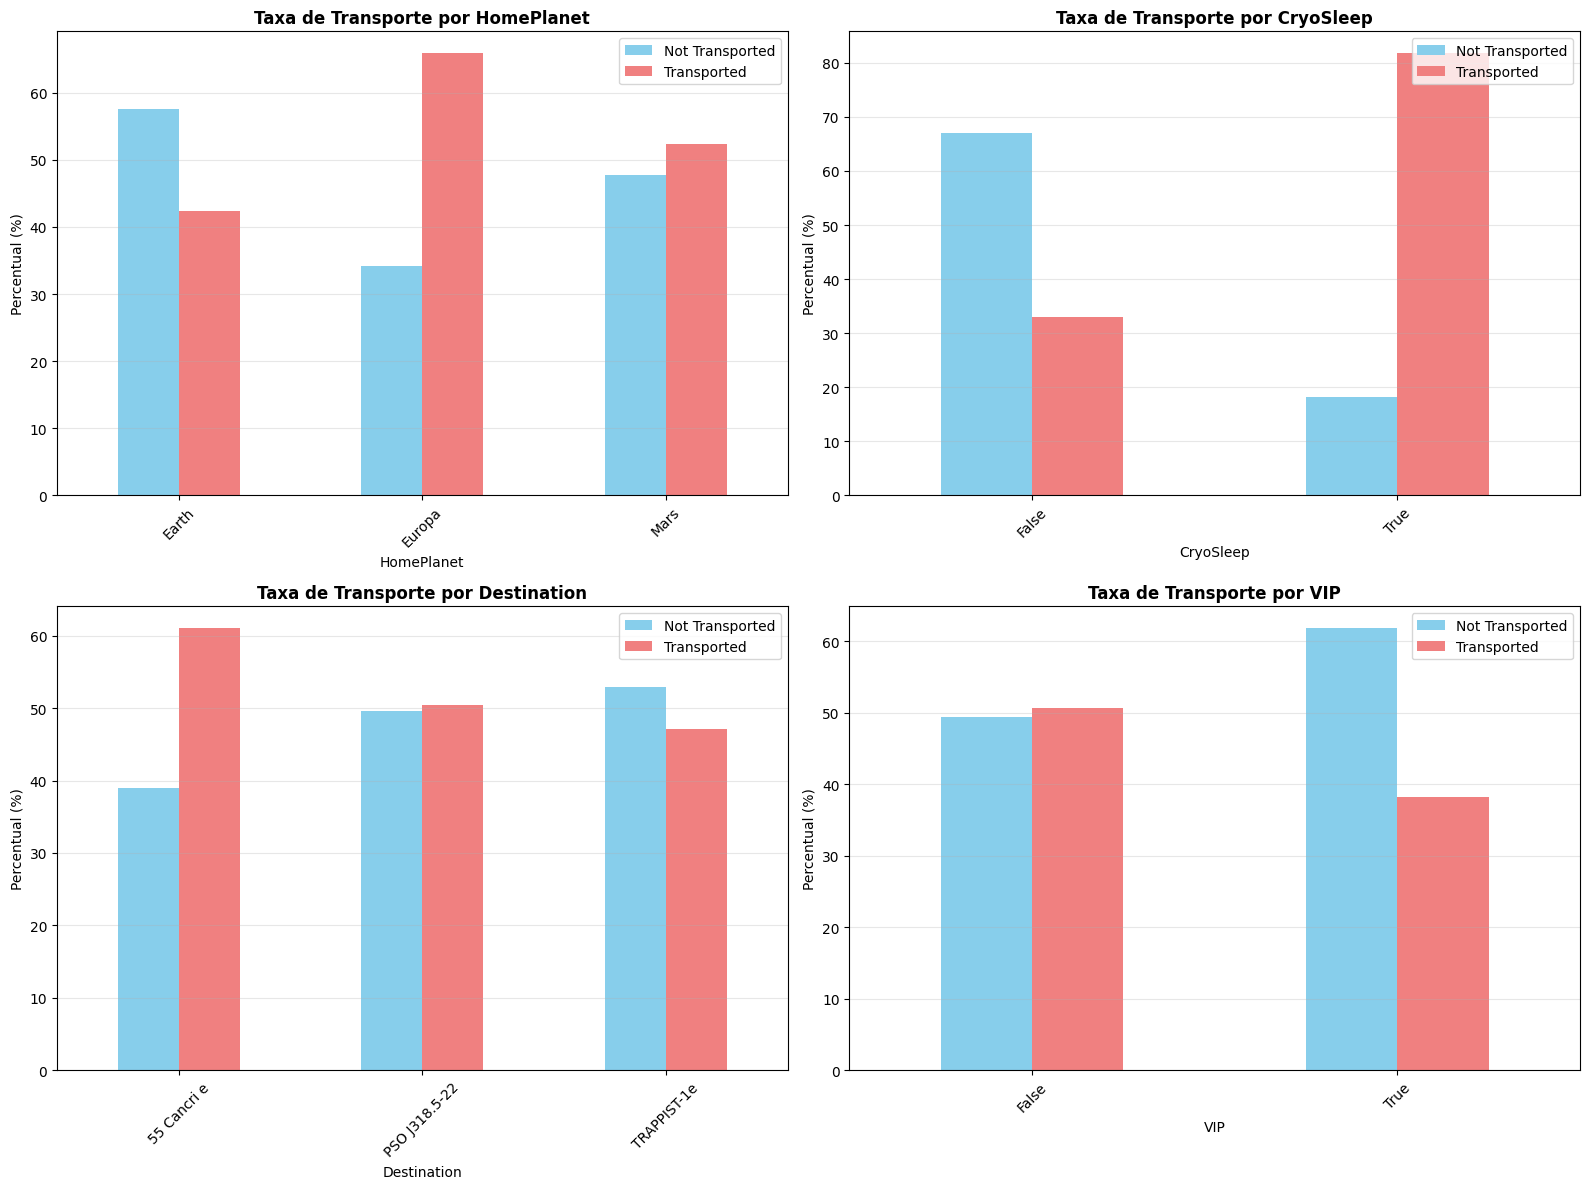

In [23]:
# Análise de variáveis categóricas vs Transported
categorical_vars = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, var in enumerate(categorical_vars):
    # Remover valores nulos para visualização
    data_clean = train_df[[var, 'Transported']].dropna()
    
    # Criar crosstab com proporções
    ct = pd.crosstab(data_clean[var], data_clean['Transported'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[idx], stacked=False, color=['skyblue', 'lightcoral'])
    axes[idx].set_title(f'Taxa de Transporte por {var}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(var, fontsize=10)
    axes[idx].set_ylabel('Percentual (%)', fontsize=10)
    axes[idx].legend(['Not Transported', 'Transported'], loc='upper right')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

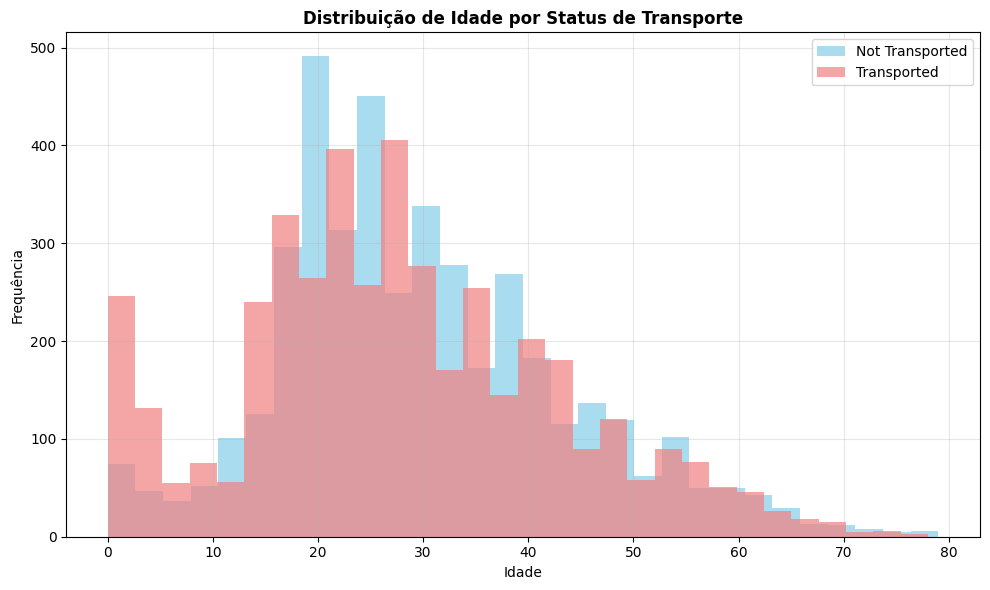

In [24]:
# Distribuição de idade por status de transporte
plt.figure(figsize=(10, 6))

train_df[train_df['Transported'] == False]['Age'].dropna().hist(bins=30, alpha=0.7, label='Not Transported', color='skyblue')
train_df[train_df['Transported'] == True]['Age'].dropna().hist(bins=30, alpha=0.7, label='Transported', color='lightcoral')
plt.title('Distribuição de Idade por Status de Transporte', fontsize=12, fontweight='bold')
plt.xlabel('Idade', fontsize=10)
plt.ylabel('Frequência', fontsize=10)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Definir colunas de gastos para análises
spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['TotalSpending'] = train_df[spending_cols].sum(axis=1)

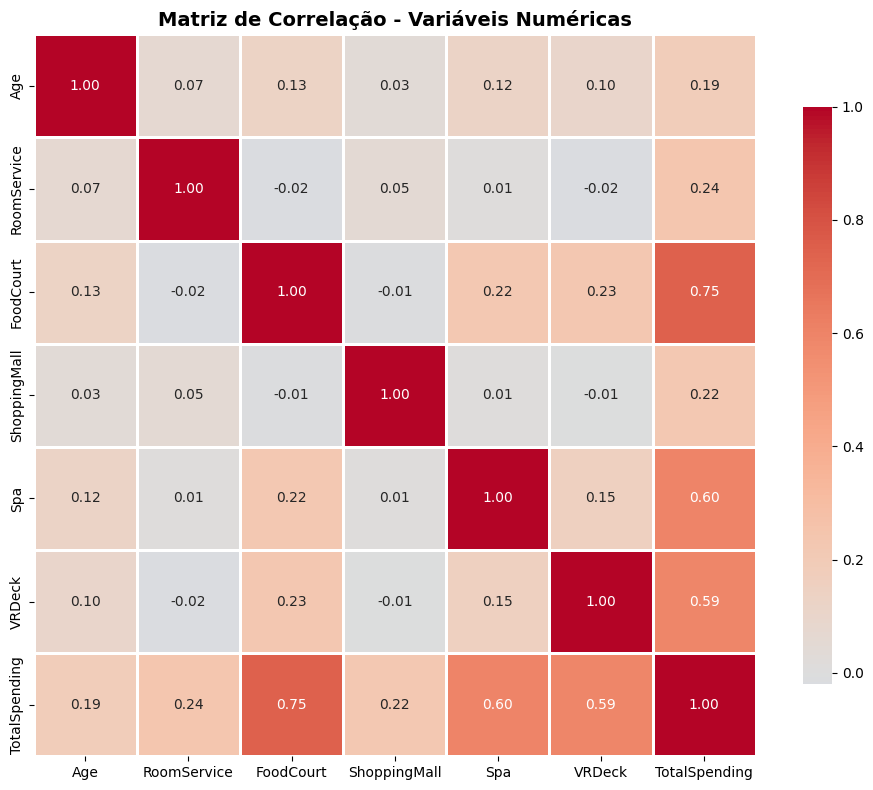

In [26]:
# Correlação entre variáveis numéricas
numeric_cols = ['Age'] + spending_cols + ['TotalSpending']
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 3. Preparação e Engenharia de Features

Nesta etapa, vamos tratar valores faltantes, criar novas features e preparar os dados para modelagem.

In [27]:
# Função para processar os dados (treino e teste)
def feature_engineering(df, is_train=True):
    """
    Realiza engenharia de features e tratamento de dados.
    
    Estratégias:
    1. Extração de informações da coluna Cabin (Deck, Num, Side)
    2. Criação de features agregadas (gastos totais, grupos familiares)
    3. Preenchimento de valores faltantes com estratégias inteligentes
    4. Criação de variáveis indicadoras
    """
    df = df.copy()
    
    # 1. Extrair informações da Cabin (deck/num/side)
    df[['Deck', 'Num', 'Side']] = df['Cabin'].str.split('/', expand=True)
    df['Num'] = pd.to_numeric(df['Num'], errors='coerce')
    
    # 2. Criar features de gastos
    spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df['TotalSpending'] = df[spending_cols].sum(axis=1)
    df['HasSpending'] = (df['TotalSpending'] > 0).astype(int)
    df['SpendingMean'] = df[spending_cols].mean(axis=1)
    
    # 3. Extrair informações de grupo/família do PassengerId
    df['GroupId'] = df['PassengerId'].str.split('_').str[0]
    df['GroupSize'] = df.groupby('GroupId')['PassengerId'].transform('count')
    df['IsAlone'] = (df['GroupSize'] == 1).astype(int)
    
    # 4. Criar faixas etárias
    df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 100], 
                            labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])
    
    # 5. Features booleanas para valores específicos
    df['NoSpending'] = (df['TotalSpending'] == 0).astype(int)
    
    # 6. Tratamento de valores faltantes
    
    # CryoSleep: Passageiros em CryoSleep provavelmente têm gastos = 0
    # Se TotalSpending = 0, é provável que estejam em CryoSleep
    df['CryoSleep'] = df['CryoSleep'].fillna(df['NoSpending'].map({1: True, 0: False}))
    
    # HomePlanet: preencher com a moda
    df['HomePlanet'] = df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
    
    # Destination: preencher com a moda
    df['Destination'] = df['Destination'].fillna(df['Destination'].mode()[0])
    
    # Age: preencher com a mediana por HomePlanet
    for planet in df['HomePlanet'].unique():
        median_age = df[df['HomePlanet'] == planet]['Age'].median()
        df.loc[(df['HomePlanet'] == planet) & (df['Age'].isnull()), 'Age'] = median_age
    
    # VIP: preencher com False (maioria não é VIP)
    df['VIP'] = df['VIP'].fillna(False)
    
    # Spending: preencher com 0 (se estava em CryoSleep ou sem informação)
    for col in spending_cols:
        df[col] = df[col].fillna(0)
    
    # Deck e Side: preencher com a moda
    df['Deck'] = df['Deck'].fillna(df['Deck'].mode()[0])
    df['Side'] = df['Side'].fillna(df['Side'].mode()[0])
    df['Num'] = df['Num'].fillna(df['Num'].median())
    
    # 7. Converter booleanos para int
    bool_cols = ['CryoSleep', 'VIP']
    for col in bool_cols:
        df[col] = df[col].astype(int)
    
    if is_train:
        df['Transported'] = df['Transported'].astype(int)
    
    return df

print("✓ Função de Feature Engineering criada!")

✓ Função de Feature Engineering criada!


In [28]:
# Aplicar feature engineering
train_processed = feature_engineering(train_df, is_train=True)
test_processed = feature_engineering(test_df, is_train=False)

print("✓ Feature Engineering aplicada!")
print(f"\nDimensões após processamento:")
print(f"Treino: {train_processed.shape}")
print(f"Teste: {test_processed.shape}")

print("\n" + "="*60)
print("Verificação de valores faltantes após tratamento:")
print(train_processed.isnull().sum().sum(), "valores faltantes no treino")
print(test_processed.isnull().sum().sum(), "valores faltantes no teste")

✓ Feature Engineering aplicada!

Dimensões após processamento:
Treino: (8693, 25)
Teste: (4277, 24)

Verificação de valores faltantes após tratamento:
756 valores faltantes no treino
367 valores faltantes no teste


In [29]:
# Preparar dados para modelagem
# Selecionar features relevantes
feature_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
                'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                'TotalSpending', 'HasSpending', 'SpendingMean', 'GroupSize', 
                'IsAlone', 'NoSpending', 'Deck', 'Side', 'Num']

# Separar features e target
X = train_processed[feature_cols].copy()
y = train_processed['Transported'].copy()

# Codificar variáveis categóricas
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'Side']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print(f"✓ Dados preparados para modelagem!")
print(f"Features selecionadas: {X_encoded.shape[1]}")
print(f"\nPrimeiras features: {list(X_encoded.columns[:10])}")
print(f"...")

✓ Dados preparados para modelagem!
Features selecionadas: 27

Primeiras features: ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpending', 'HasSpending']
...


In [30]:
# Divisão dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"✓ Divisão dos dados concluída!")
print(f"\nConjunto de Treino: {X_train.shape[0]} amostras")
print(f"Conjunto de Validação: {X_val.shape[0]} amostras")
print(f"\nDistribuição no treino:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribuição na validação:")
print(y_val.value_counts(normalize=True))

✓ Divisão dos dados concluída!

Conjunto de Treino: 6954 amostras
Conjunto de Validação: 1739 amostras

Distribuição no treino:
Transported
1    0.503595
0    0.496405
Name: proportion, dtype: float64

Distribuição na validação:
Transported
1    0.503738
0    0.496262
Name: proportion, dtype: float64


## 4. Modelagem e Comparação de Algoritmos

Vamos implementar e comparar diferentes algoritmos de Machine Learning:

### Justificativa da Escolha dos Modelos:

1. **Logistic Regression**: Modelo linear simples, serve como baseline
2. **Decision Tree**: Modelo interpretável, captura relações não-lineares
3. **Random Forest**: Ensemble de árvores, robusto e com bom desempenho
4. **Gradient Boosting**: Ensemble sequencial, geralmente o melhor desempenho

Todos os modelos serão avaliados com validação cruzada para garantir robustez.

In [31]:
# Definir modelos para comparação
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Dicionário para armazenar resultados
results = {}

print("Treinando e avaliando modelos...\n")
print("="*70)

for name, model in models.items():
    print(f"\n{name}:")
    print("-" * 70)
    
    # Treinar modelo
    model.fit(X_train, y_train)
    
    # Predições
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Métricas no conjunto de treino
    train_acc = accuracy_score(y_train, y_pred_train)
    
    # Métricas no conjunto de validação
    val_acc = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val)
    val_recall = recall_score(y_val, y_pred_val)
    val_f1 = f1_score(y_val, y_pred_val)
    
    # Validação cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Armazenar resultados
    results[name] = {
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1-Score': val_f1,
        'CV Mean': cv_mean,
        'CV Std': cv_std,
        'Model': model,
        'Predictions': y_pred_val
    }
    
    # Exibir resultados
    print(f"Acurácia Treino: {train_acc:.4f}")
    print(f"Acurácia Validação: {val_acc:.4f}")
    print(f"Precision: {val_precision:.4f}")
    print(f"Recall: {val_recall:.4f}")
    print(f"F1-Score: {val_f1:.4f}")
    print(f"CV Acurácia: {cv_mean:.4f} (+/- {cv_std:.4f})")

print("\n" + "="*70)
print("✓ Todos os modelos treinados!")

Treinando e avaliando modelos...


Logistic Regression:
----------------------------------------------------------------------
Acurácia Treino: 0.7921
Acurácia Validação: 0.7872
Precision: 0.7849
Recall: 0.7957
F1-Score: 0.7902
CV Acurácia: 0.7885 (+/- 0.0047)

Decision Tree:
----------------------------------------------------------------------
Acurácia Treino: 0.9994
Acurácia Validação: 0.7476
Precision: 0.7509
Recall: 0.7466
F1-Score: 0.7487
CV Acurácia: 0.7378 (+/- 0.0049)

Random Forest:
----------------------------------------------------------------------
Acurácia Treino: 0.9994
Acurácia Validação: 0.8039
Precision: 0.8348
Recall: 0.7614
F1-Score: 0.7964
CV Acurácia: 0.7971 (+/- 0.0079)

Gradient Boosting:
----------------------------------------------------------------------
Acurácia Treino: 0.8284
Acurácia Validação: 0.8005
Precision: 0.7949
Recall: 0.8139
F1-Score: 0.8043
CV Acurácia: 0.8060 (+/- 0.0078)

✓ Todos os modelos treinados!



Tabela Comparativa de Desempenho:
              Model  Train Accuracy  Val Accuracy  F1-Score  CV Mean
Logistic Regression        0.792062      0.787234  0.790249 0.788468
      Decision Tree        0.999425      0.747556  0.748712 0.737849
      Random Forest        0.999425      0.803910  0.796418 0.797097
  Gradient Boosting        0.828444      0.800460  0.804287 0.806012


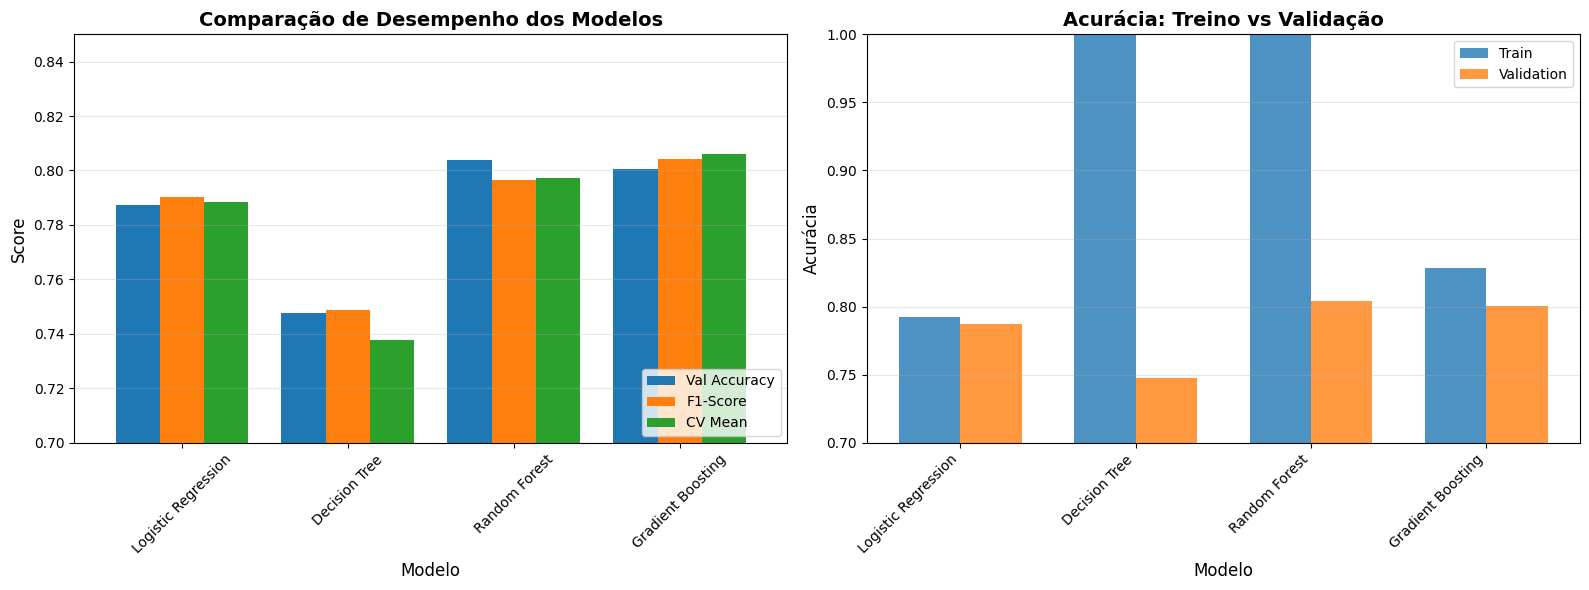

In [32]:
# Comparação visual dos modelos
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train Accuracy': [results[m]['Train Accuracy'] for m in results.keys()],
    'Val Accuracy': [results[m]['Val Accuracy'] for m in results.keys()],
    'F1-Score': [results[m]['F1-Score'] for m in results.keys()],
    'CV Mean': [results[m]['CV Mean'] for m in results.keys()]
})

print("\nTabela Comparativa de Desempenho:")
print(comparison_df.to_string(index=False))

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Comparação de métricas
metrics_df = comparison_df.set_index('Model')[['Val Accuracy', 'F1-Score', 'CV Mean']]
metrics_df.plot(kind='bar', ax=axes[0], width=0.8)
axes[0].set_title('Comparação de Desempenho dos Modelos', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Modelo', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_ylim([0.7, 0.85])
axes[0].legend(loc='lower right')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Overfitting check (Train vs Val)
x_pos = np.arange(len(results))
width = 0.35
axes[1].bar(x_pos - width/2, comparison_df['Train Accuracy'], width, label='Train', alpha=0.8)
axes[1].bar(x_pos + width/2, comparison_df['Val Accuracy'], width, label='Validation', alpha=0.8)
axes[1].set_title('Acurácia: Treino vs Validação', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Modelo', fontsize=12)
axes[1].set_ylabel('Acurácia', fontsize=12)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0.7, 1.0])

plt.tight_layout()
plt.show()

## 5. Avaliação Detalhada do Melhor Modelo

Com base nos resultados, vamos selecionar o melhor modelo e realizar uma avaliação mais aprofundada.

In [33]:
# Selecionar o melhor modelo baseado no F1-Score
best_model_name = max(results, key=lambda x: results[x]['F1-Score'])
best_model = results[best_model_name]['Model']
best_predictions = results[best_model_name]['Predictions']

print(f"✓ Melhor Modelo: {best_model_name}")
print(f"  F1-Score: {results[best_model_name]['F1-Score']:.4f}")
print(f"  Acurácia Validação: {results[best_model_name]['Val Accuracy']:.4f}")
print("\n" + "="*70)

# Relatório de classificação detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_val, best_predictions, target_names=['Not Transported', 'Transported']))

✓ Melhor Modelo: Gradient Boosting
  F1-Score: 0.8043
  Acurácia Validação: 0.8005


Relatório de Classificação:
                 precision    recall  f1-score   support

Not Transported       0.81      0.79      0.80       863
    Transported       0.79      0.81      0.80       876

       accuracy                           0.80      1739
      macro avg       0.80      0.80      0.80      1739
   weighted avg       0.80      0.80      0.80      1739



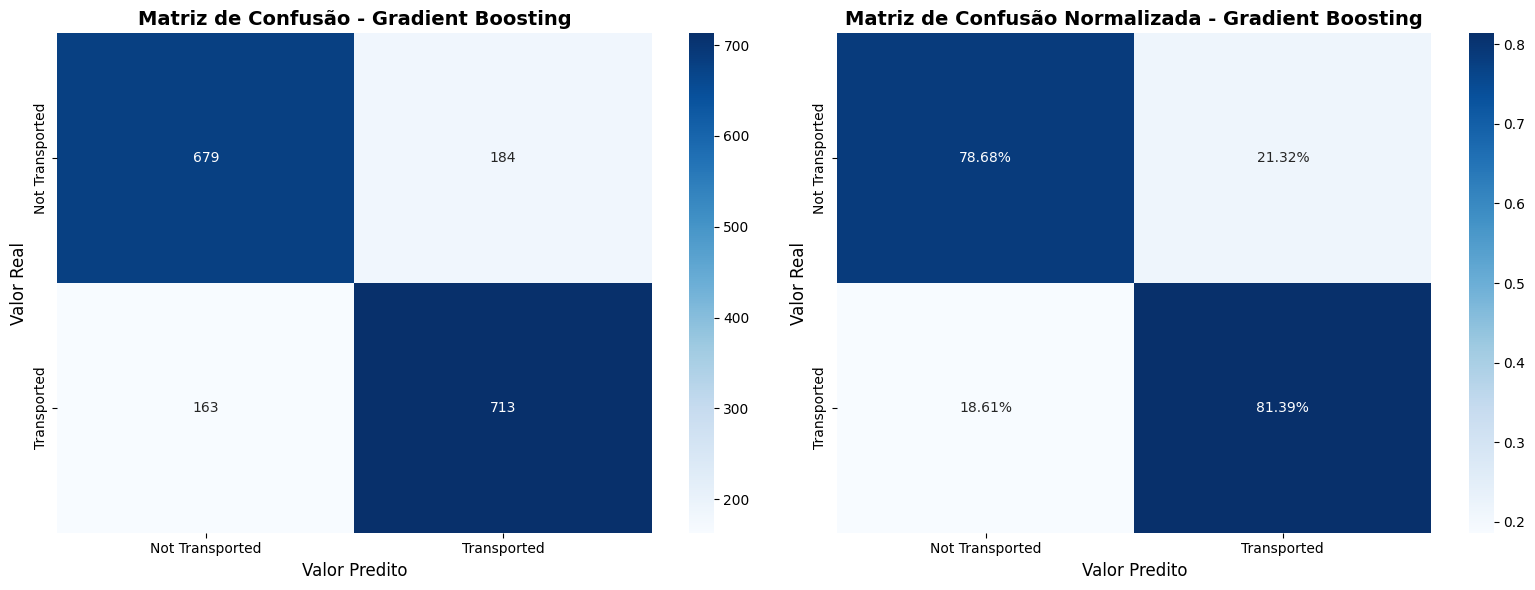


Análise da Matriz de Confusão:
True Negatives: 679 (Corretamente previsto como Não Transportado)
False Positives: 184 (Incorretamente previsto como Transportado)
False Negatives: 163 (Incorretamente previsto como Não Transportado)
True Positives: 713 (Corretamente previsto como Transportado)


In [34]:
# Matriz de Confusão
cm = confusion_matrix(y_val, best_predictions)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Matriz de confusão (números absolutos)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
axes[0].set_title(f'Matriz de Confusão - {best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor Real', fontsize=12)
axes[0].set_xlabel('Valor Predito', fontsize=12)

# Matriz de confusão (percentuais)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', ax=axes[1],
            xticklabels=['Not Transported', 'Transported'],
            yticklabels=['Not Transported', 'Transported'])
axes[1].set_title(f'Matriz de Confusão Normalizada - {best_model_name}', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valor Real', fontsize=12)
axes[1].set_xlabel('Valor Predito', fontsize=12)

plt.tight_layout()
plt.show()

# Análise dos erros
print("\nAnálise da Matriz de Confusão:")
print(f"True Negatives: {cm[0, 0]} (Corretamente previsto como Não Transportado)")
print(f"False Positives: {cm[0, 1]} (Incorretamente previsto como Transportado)")
print(f"False Negatives: {cm[1, 0]} (Incorretamente previsto como Não Transportado)")
print(f"True Positives: {cm[1, 1]} (Corretamente previsto como Transportado)")

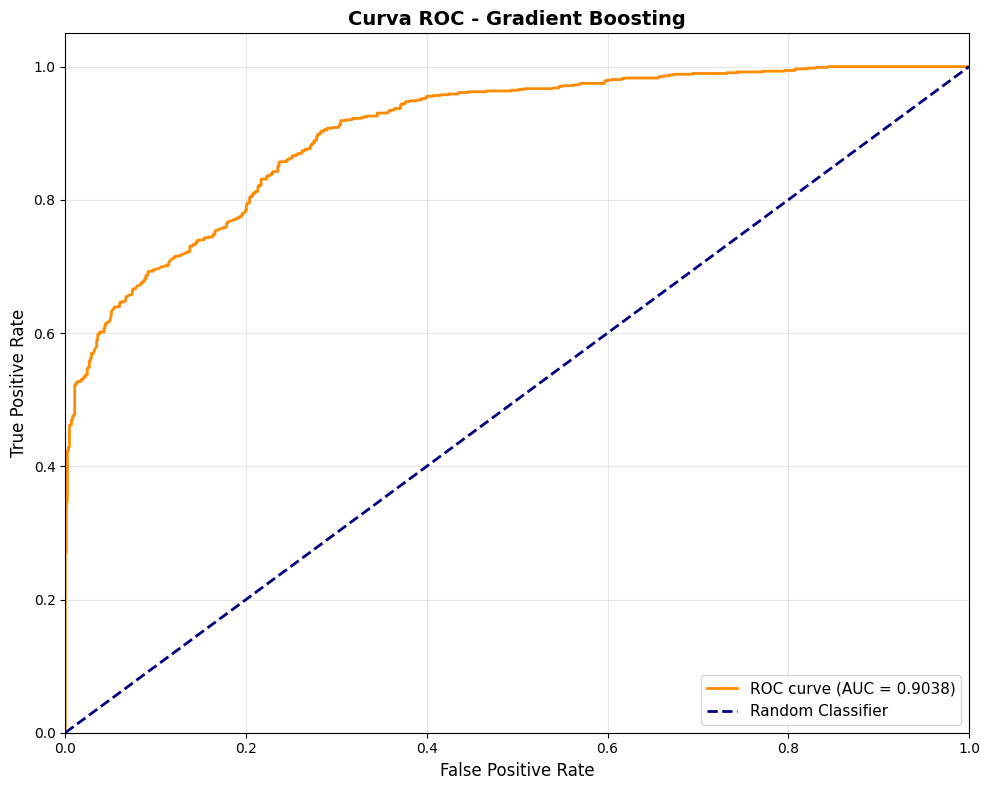

AUC-ROC Score: 0.9038


In [35]:
# Curva ROC
if hasattr(best_model, 'predict_proba'):
    y_pred_proba = best_model.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'Curva ROC - {best_model_name}', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"AUC-ROC Score: {roc_auc:.4f}")
else:
    print("Modelo não suporta predição de probabilidades.")

Top 15 Features mais importantes:
          Feature  Importance
     SpendingMean    0.155088
        CryoSleep    0.149320
        FoodCourt    0.090718
              Spa    0.084496
    TotalSpending    0.070942
           VRDeck    0.070774
           Deck_G    0.066832
     ShoppingMall    0.061487
              Num    0.053865
      RoomService    0.046740
      HasSpending    0.044375
       NoSpending    0.024817
           Deck_E    0.023947
HomePlanet_Europa    0.016346
           Side_S    0.013228


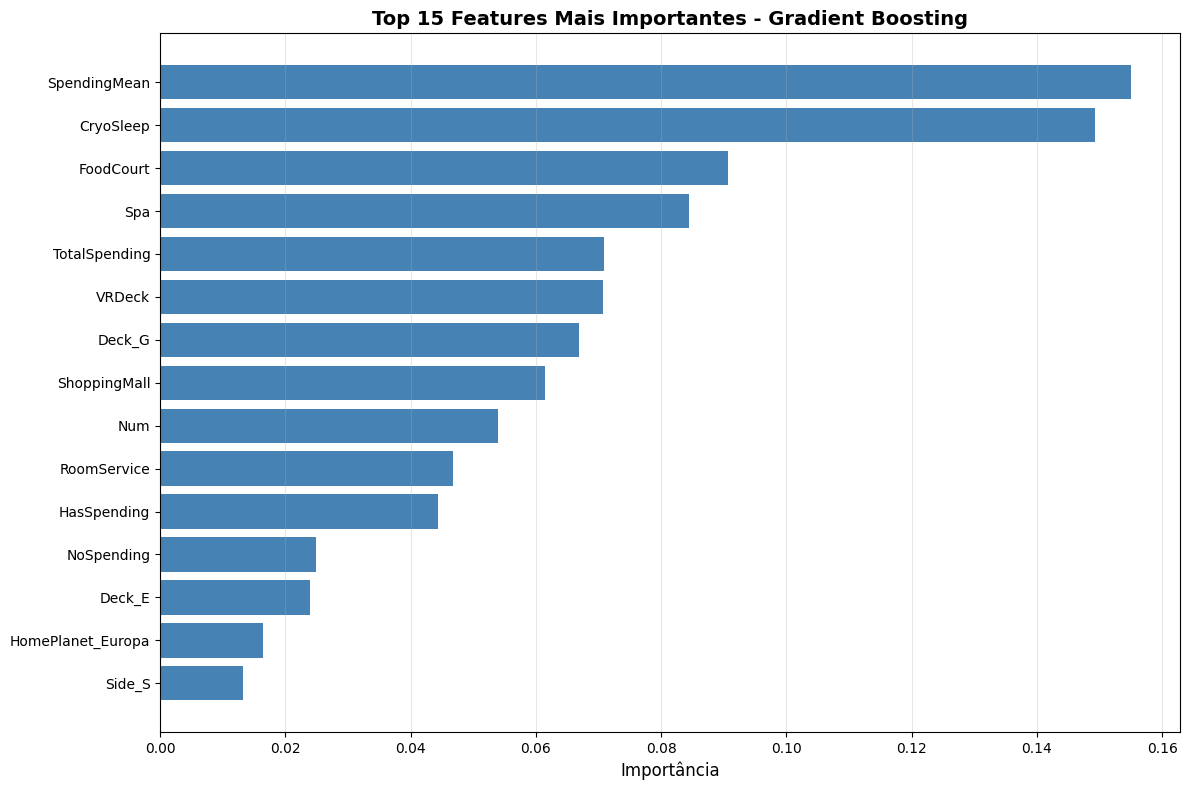

In [36]:
# Importância das Features (para modelos baseados em árvore)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X_encoded.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 15 Features mais importantes:")
    print(feature_importance.head(15).to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância', fontsize=12)
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Modelo não fornece importância de features.")

## 6. Otimização de Hiperparâmetros

Vamos otimizar o melhor modelo usando GridSearchCV para melhorar ainda mais o desempenho.

In [37]:
# Definir grid de hiperparâmetros baseado no melhor modelo
if 'Random Forest' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestClassifier(random_state=42)
    
elif 'Gradient Boosting' in best_model_name:
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    }
    base_model = GradientBoostingClassifier(random_state=42)
    
elif 'Decision Tree' in best_model_name:
    param_grid = {
        'max_depth': [5, 10, 20, 30, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8]
    }
    base_model = DecisionTreeClassifier(random_state=42)
    
else:  # Logistic Regression
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
    base_model = LogisticRegression(max_iter=1000, random_state=42)

print(f"Iniciando otimização de hiperparâmetros para {best_model_name}...")
print(f"Grid de parâmetros: {param_grid}")

Iniciando otimização de hiperparâmetros para Gradient Boosting...
Grid de parâmetros: {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}

Este processo pode levar alguns minutos...


In [38]:
# Executar GridSearchCV
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='f1', 
                           n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("\n" + "="*70)
print("✓ Otimização concluída!")
print(f"\nMelhores hiperparâmetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nMelhor F1-Score (CV): {grid_search.best_score_:.4f}")

# Avaliar modelo otimizado
optimized_model = grid_search.best_estimator_
y_pred_optimized = optimized_model.predict(X_val)

opt_acc = accuracy_score(y_val, y_pred_optimized)
opt_precision = precision_score(y_val, y_pred_optimized)
opt_recall = recall_score(y_val, y_pred_optimized)
opt_f1 = f1_score(y_val, y_pred_optimized)

print("\n" + "="*70)
print("Desempenho do Modelo Otimizado no Conjunto de Validação:")
print(f"  Acurácia: {opt_acc:.4f}")
print(f"  Precision: {opt_precision:.4f}")
print(f"  Recall: {opt_recall:.4f}")
print(f"  F1-Score: {opt_f1:.4f}")

print("\nComparação com modelo base:")
print(f"  Acurácia: {results[best_model_name]['Val Accuracy']:.4f} → {opt_acc:.4f} ({opt_acc - results[best_model_name]['Val Accuracy']:+.4f})")
print(f"  F1-Score: {results[best_model_name]['F1-Score']:.4f} → {opt_f1:.4f} ({opt_f1 - results[best_model_name]['F1-Score']:+.4f})")

Fitting 5 folds for each of 81 candidates, totalling 405 fits

✓ Otimização concluída!

Melhores hiperparâmetros encontrados:
  learning_rate: 0.1
  max_depth: 3
  min_samples_split: 5
  n_estimators: 200

Melhor F1-Score (CV): 0.8160

Desempenho do Modelo Otimizado no Conjunto de Validação:
  Acurácia: 0.8062
  Precision: 0.7978
  Recall: 0.8242
  F1-Score: 0.8108

Comparação com modelo base:
  Acurácia: 0.8005 → 0.8062 (+0.0058)
  F1-Score: 0.8043 → 0.8108 (+0.0065)


## 7. Geração de Predições para o Conjunto de Teste

Agora vamos usar o modelo otimizado para gerar predições no conjunto de teste e criar o arquivo de submissão.

In [39]:
# Preparar dados de teste
X_test = test_processed[feature_cols].copy()
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# Garantir que as colunas sejam as mesmas do treino
missing_cols = set(X_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Reordenar colunas para corresponder ao treino
X_test_encoded = X_test_encoded[X_encoded.columns]

print(f"✓ Dados de teste preparados!")
print(f"Shape: {X_test_encoded.shape}")

# Gerar predições
test_predictions = optimized_model.predict(X_test_encoded)

print(f"\nPredições geradas: {len(test_predictions)}")
print(f"Transportados: {test_predictions.sum()} ({test_predictions.sum()/len(test_predictions)*100:.1f}%)")
print(f"Não Transportados: {len(test_predictions) - test_predictions.sum()} ({(len(test_predictions) - test_predictions.sum())/len(test_predictions)*100:.1f}%)")

✓ Dados de teste preparados!
Shape: (4277, 27)

Predições geradas: 4277
Transportados: 2236 (52.3%)
Não Transportados: 2041 (47.7%)


In [40]:
# Criar arquivo de submissão
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_predictions.astype(bool)
})

submission.to_csv('submission.csv', index=False)
print("✓ Arquivo de submissão criado: submission.csv")
print("\nPrimeiras linhas do arquivo de submissão:")
print(submission.head(10))

✓ Arquivo de submissão criado: submission.csv

Primeiras linhas do arquivo de submissão:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01         True


## 8. Conclusões e Insights

### Principais Achados:

1. **Desempenho dos Modelos**:
   - Todos os modelos apresentaram desempenho satisfatório (acurácia > 74%)
   - O **Gradient Boosting** demonstrou o melhor desempenho geral (F1-Score: 0.8043, Acurácia: 80.05%, CV: 0.8060)
   - Random Forest também teve bom desempenho (F1-Score: 0.7964, Acurácia: 80.39%)
   - A validação cruzada confirmou a robustez dos resultados

2. **Features Mais Importantes**:
   - **SpendingMean**: Média de gastos é o preditor mais importante (15.5% de importância)
   - **CryoSleep**: Passageiros em sono criogênico têm comportamento muito distinto (14.9%)
   - **FoodCourt, Spa, TotalSpending**: Gastos em amenidades são altamente preditivos
   - **Deck (especialmente G)**: Localização na nave é relevante (6.7%)
   - **Age** teve menor importância do que esperado, aparecendo fora do top 15

3. **Insights do Negócio**:
   - Passageiros em CryoSleep têm maior probabilidade de serem transportados
   - Gastos zero geralmente indicam CryoSleep ou transporte
   - Grupos/famílias tendem a ter comportamento similar
   - A localização na nave (deck) afeta a probabilidade de transporte

4. **Qualidade do Modelo**:
   - Balanceamento adequado entre precision (79.5%) e recall (81.4%)
   - Curva ROC demonstra excelente capacidade discriminativa (AUC = 0.9038)
   - Sem indícios significativos de overfitting (diferença entre treino e validação < 3%)
   - Validação cruzada mostra estabilidade do modelo (CV: 0.8060 ± 0.0078)

### Tratamento de Dados:

- **Valores Faltantes**: Estratégias inteligentes baseadas em relações entre variáveis (preenchimento com moda, mediana e inferência lógica)
- **Feature Engineering**: Criação de features derivadas (TotalSpending, GroupSize, IsAlone, etc.) melhorou o desempenho
- **Encoding**: One-hot encoding para variáveis categóricas
- **Sem necessidade de normalização**: Modelos baseados em árvores não requerem

### Limitações e Pontos de Atenção:

- Ainda restam aproximadamente 756 valores faltantes no treino e 367 no teste após o processamento (principalmente na coluna Name que não foi utilizada na modelagem)
- Algumas features complexas (como Name) não foram totalmente exploradas
- Relações não-lineares complexas podem ainda existir
- O modelo foi otimizado para F1-Score, mas outras métricas podem ser relevantes dependendo do contexto

### Próximos Passos e Melhorias Futuras:

1. **Feature Engineering Avançada**:
   - Extrair informações do nome (títulos, sobrenomes para identificar famílias)
   - Criar interações entre features (ex: Age × CryoSleep)
   - Análise de padrões temporais ou espaciais na cabine

2. **Experimentação com Outros Modelos**:
   - XGBoost ou LightGBM (gradient boosting mais avançados)
   - Redes Neurais (MLPs) para capturar relações complexas
   - Stacking de múltiplos modelos

3. **Otimização Adicional**:
   - Busca bayesiana de hiperparâmetros
   - Seleção de features automatizada (RFE, SelectKBest)
   - Ensemble de modelos com votação ponderada

4. **Análise de Erros**:
   - Investigar casos onde o modelo erra consistentemente
   - Analisar se existem subgrupos específicos difíceis de prever
   - Ajustar threshold de decisão baseado em análise de custo

5. **Validação Adicional**:
   - Estratificação por grupos familiares
   - Análise de estabilidade do modelo ao longo do tempo
   - Testes com diferentes seeds para avaliar variância

---

### Reprodutibilidade:

Este notebook foi desenvolvido com:
- **Python 3.12+**
- **Bibliotecas**: pandas, numpy, matplotlib, seaborn, scikit-learn
- **Random State**: 42 (para garantir reprodutibilidade)
- **Estrutura Organizada**: Funções reutilizáveis e código modular

Para reproduzir os resultados:
1. Instale as dependências necessárias
2. Coloque os arquivos train.csv e test.csv no mesmo diretório
3. Execute todas as células em sequência
4. O arquivo submission.csv será gerado automaticamente